In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [34]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [35]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [36]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3900\2840544469.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [37]:
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
            'PaperlessBilling', 'PaymentMethod']
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [38]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [39]:
y = df_encoded['Churn'].map({'Yes': 1, 'No': 0}).values
X = df_encoded.drop(['customerID', 'Churn'], axis=1).values

In [40]:

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:

model_no_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:

model_no_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_no_dropout = model_no_dropout.fit(
    X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

In [44]:

model_with_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [45]:

model_with_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_with_dropout = model_with_dropout.fit(
    X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

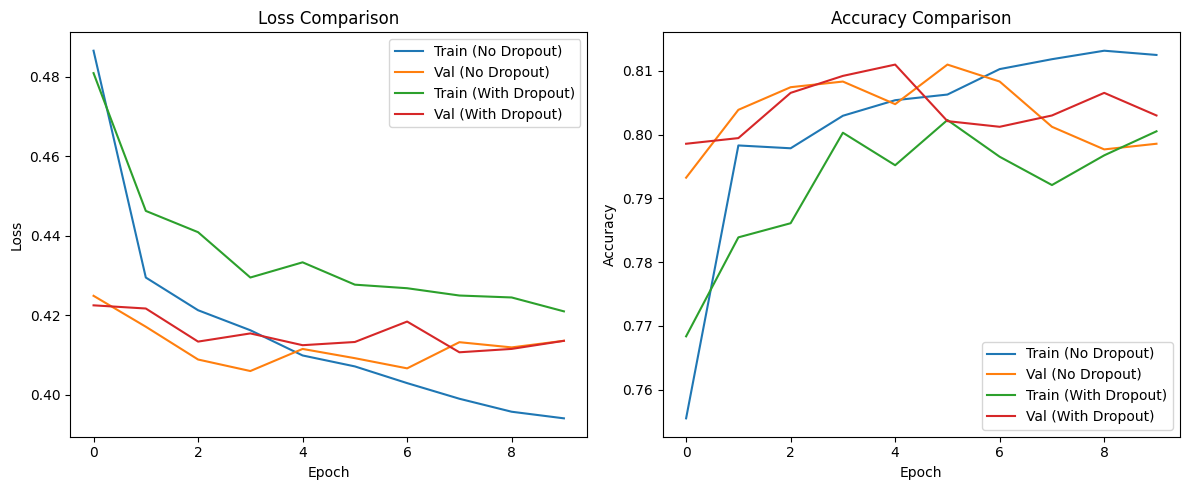

In [46]:

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_no_dropout.history['loss'], label='Train (No Dropout)')
plt.plot(history_no_dropout.history['val_loss'], label='Val (No Dropout)')
plt.plot(history_with_dropout.history['loss'], label='Train (With Dropout)')
plt.plot(history_with_dropout.history['val_loss'], label='Val (With Dropout)')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_no_dropout.history['accuracy'], label='Train (No Dropout)')
plt.plot(history_no_dropout.history['val_accuracy'], label='Val (No Dropout)')
plt.plot(history_with_dropout.history['accuracy'], label='Train (With Dropout)')
plt.plot(history_with_dropout.history['val_accuracy'], label='Val (With Dropout)')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [47]:

test_loss_no_dropout, test_acc_no_dropout = model_no_dropout.evaluate(X_test, y_test)
test_loss_with_dropout, test_acc_with_dropout = model_with_dropout.evaluate(X_test, y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8047 - loss: 0.4117
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8039 - loss: 0.4077


In [48]:

comparison = pd.DataFrame({
    'Model': ['Without Dropout', 'With Dropout'],
    'Test Accuracy': [test_acc_no_dropout, test_acc_with_dropout],
    'Test Loss': [test_loss_no_dropout, test_loss_with_dropout]
})

print(comparison)
print("\nAnalysis:")
print("Dropout regularization helps prevent overfitting by randomly dropping neurons during training.")
print("This forces the network to learn more robust features that are useful in conjunction")
print("with many different random subsets of the other neurons.")

             Model  Test Accuracy  Test Loss
0  Without Dropout       0.815472   0.409939
1     With Dropout       0.807665   0.405355

Analysis:
Dropout regularization helps prevent overfitting by randomly dropping neurons during training.
This forces the network to learn more robust features that are useful in conjunction
with many different random subsets of the other neurons.
